In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.optimize
import scipy

In [3]:
rlc_spectrum = pd.read_csv("data/part-2-data.csv", skiprows=45, delimiter=";", decimal=",")

freq_rlc_1 = rlc_spectrum["Frequency [Hz]"].to_numpy()
power_rlc_1 = rlc_spectrum["Magnitude [dBm]"].to_numpy()

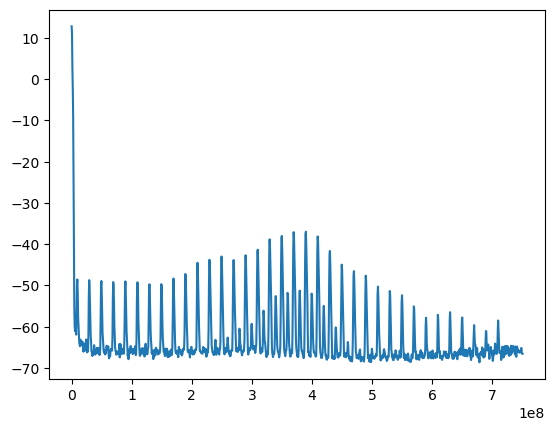

In [4]:
plt.plot(freq_rlc_1, power_rlc_1)
plt.show()
#print(power_rlc_1[0:5])

In [5]:
rlc_bode = pd.read_csv("data/bode-rlc.csv", skiprows=45, delimiter=";", decimal=",")

freq_rlc_2 = rlc_bode["Frequency [Hz]"].to_numpy()/(1e6)
power_rlc_2 = rlc_bode["Magnitude [dBm]"].to_numpy()

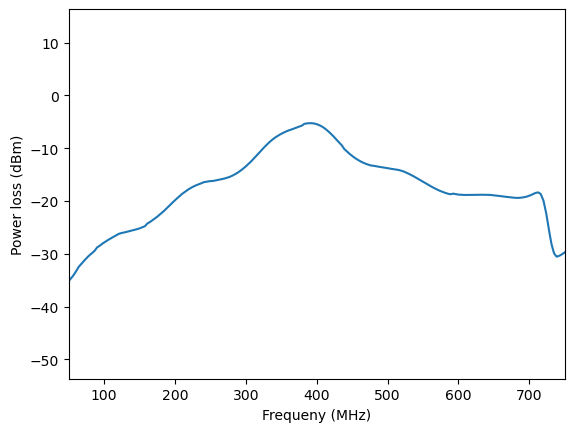

In [6]:
plt.plot(freq_rlc_2, power_rlc_2)
plt.xlim((50, 750))

plt.ylabel("Power loss (dBm)")
plt.xlabel("Frequeny (MHz)")
plt.show()

Lorentzian Fitting

<class 'list'>


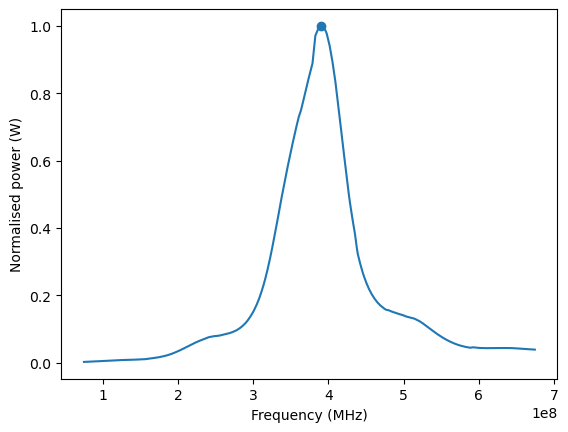

In [13]:
m, M = 0.1, 0.9
## Define function to convert dBm to Watt#######
def conv(P_dbm):
    P_w=10**((P_dbm)/10)
    return P_w
# define fitting function via Eq. 2.100 and the Figure 2.11 in page 55########
def fit(freq,R,C,L):
    lor = 1/(( 1+(1/(R*R))*((1/(2*np.pi*freq*C)-L*2*np.pi*freq)**2) ))
    return lor

def fit2(freq,R):
    C = 1.7e-12 # F
    L = 100e-9 # H
    lor = 1/(( 1+(1/(R*R))*((1/(2*np.pi*freq*C)-L*2*np.pi*freq)**2) ))
    return lor



freq=[]
P_dbm=[]
x=[]
y=[]
print(type(x))

#### Read the csv data#######
f=pd.read_csv("data/bode-rlc.csv", delimiter=";",header=0, skiprows=45, decimal=",")
### Cut the range of the data where lorentzian distribution is relevant#########
newf=f[int(len(f)*m) : int(len(f)*M)]

###Continue reading the columns ########
freq=newf["Frequency [Hz]"].to_numpy()# / 1e6 # MHz
P_dbm=newf["Magnitude [dBm]"].to_numpy()
##### Create float arrays for x as the frequency and y as the dBm. ######
'''
for i in range(len(freql)):
    x.append(freql[i].replace(",","."))
    y.append(P_dbml[i].replace(",","."))
    freq.append(float(x[i]))
    P_dbm.append(float(y[i]))
P_W=np.zeros(len(P_dbm))
'''

P_W = conv(P_dbm)


#### Convert dBm to Watt #########
#for kk in range(len(P_dbm)):
   # P_W[kk]=conv(P_dbm[kk])

#### normalize Watt ########
P_W=P_W/max(P_W)

max_index = 0
for i in range(len(P_W)):
    if P_W[i] > P_W[max_index]:
        max_index = i



plt.plot(freq, P_W)
plt.scatter(freq[max_index], P_W[max_index], zorder=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalised power (W)")
plt.show()


def fit2(f,R):
    f0 = freq[max_index]
    L = 100e-9 # H

    C = 1/ ((2*np.pi * np.sqrt(L) * f0)**2)

    lor = 1/(( 1+(1/(R*R))*((1/(2*np.pi*f*C)-L*2*np.pi*f)**2) ))
    return lor




[3.75781277e+01 2.40374717e-12 7.13704923e-08]
this is the new version


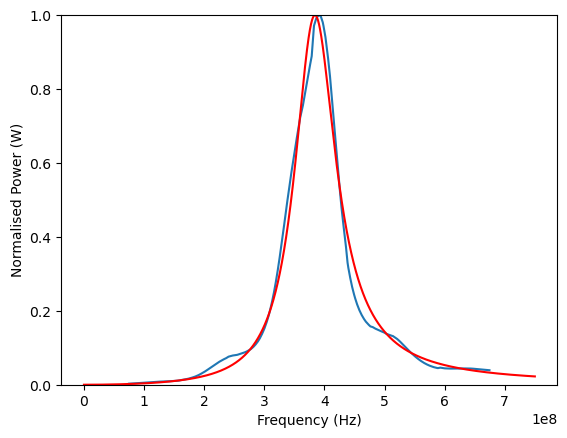

In [8]:
#### Guess parameters as follows [Rl (Ohm), C (pF), L(nH)] #####
Guess=[50,1.7e-12,100e-9]

#### Call the fitting function from scipy library ########
popt,pcov=scipy.optimize.curve_fit(fit,freq,P_W, p0 = Guess)
#### optimised parameters popt provide the best values for R,C and L if your fitting is valid #########
print(popt)
###Creating and array of frequency between 5 kHz to 750 MHz #########
array_freq=np.linspace(5000,750000000,10000)
last_fit=np.zeros(len(array_freq))
#### Send the guess parameters extracted from popt as R,C,L #########
last_fit=[fit(l,popt[0],popt[1],popt[2]) for l in array_freq]
### Plot the original data and fitted data (red curve) check if the fit is okay. If no, change guess values. #####

fig, ax=plt.subplots()
ax.set_ylim([0,1])
#ax.set_xlim([0.15e9,0.5e9])
ax.plot(freq,P_W)
ax.plot(array_freq, last_fit,"r")
ax.set_xlabel("Frequency (Hz)")#, fontsize=15)
ax.set_ylabel("Normalised Power (W)")#, fontsize=15)
print("this is the new version")
### Save the figure. #######
#plt.savefig("Lorenz_fit.pdf")
plt.show()


[52.12288632]
this is the new version


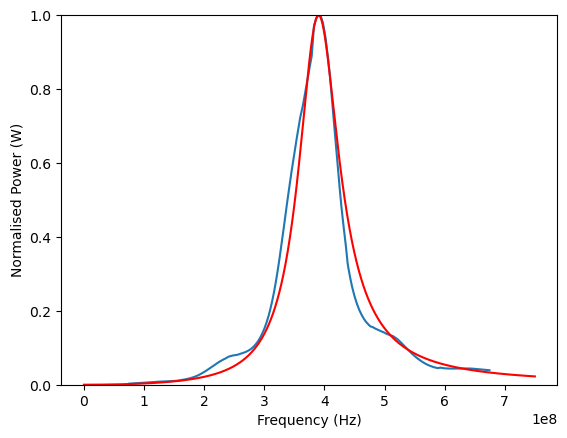

In [14]:
#### Guess parameters as follows [Rl (Ohm), C (pF), L(nH)] #####
Guess=[50]

#### Call the fitting function from scipy library ########
popt,pcov=scipy.optimize.curve_fit(fit2,freq,P_W, p0 = Guess)
#### optimised parameters popt provide the best values for R,C and L if your fitting is valid #########
print(popt)
###Creating and array of frequency between 5 kHz to 750 MHz #########
array_freq=np.linspace(5000,750000000,10000)
last_fit=np.zeros(len(array_freq))
#### Send the guess parameters extracted from popt as R #######
last_fit=[fit2(l,popt[0]) for l in array_freq]
### Plot the original data and fitted data (red curve) check if the fit is okay. If no, change guess values. #####

fig, ax=plt.subplots()
ax.set_ylim([0,1])
#ax.set_xlim([0.15e9,0.5e9])
ax.plot(freq,P_W)
ax.plot(array_freq, last_fit,"r")
ax.set_xlabel("Frequency (Hz)")#, fontsize=15)
ax.set_ylabel("Normalised Power (W)")#, fontsize=15)
print("this is the new version")
### Save the figure. #######
#plt.savefig("Lorenz_fit.pdf")
plt.show()